1. Loading the JSON data into MongoDB

In [31]:
import json
from pymongo import MongoClient
from bson import ObjectId
import warnings

# Replace the connection URL with your MongoDB URL
client = MongoClient("mongodb://localhost:27017/")

# Create or connect to a database
db = client["Project"]

# Create or connect to a collection
collection = db["PFAI_Project"]

# Load JSON file
try:
    with open('heart_dataset.json', 'r') as file:
        data = json.load(file)  # Load JSON data
except FileNotFoundError:
    print("Error: The file 'heart_dataset.json' was not found.")
    exit(1)
except json.JSONDecodeError:
    print("Error: Failed to decode JSON. Please check the file's format.")
    exit(1)

# Convert $oid fields to ObjectId
def convert_oid(document):
    if isinstance(document, dict):
        for key, value in document.items():
            if isinstance(value, dict) and "$oid" in value:
                document[key] = ObjectId(value["$oid"])
            elif isinstance(value, (dict, list)):
                convert_oid(value)
    elif isinstance(document, list):
        for item in document:
            convert_oid(item)

convert_oid(data)

# Insert data into the collection
try:
    if isinstance(data, list):
        result = collection.insert_many(data)  # Insert multiple documents
        print(f"{len(result.inserted_ids)} documents successfully inserted.")
    else:
        result = collection.insert_one(data)  # Insert a single document
        print(f"1 document successfully inserted with ID: {result.inserted_id}")
except Exception as e:
    print(f"Error inserting data into MongoDB: {e}")
    exit(1)

# Verify the insertion
print("Inserted Documents Count:", collection.count_documents({}))


319795 documents successfully inserted.
Inserted Documents Count: 319795


2. Load the stored data in Mongodb into a python dataframe for processing

In [33]:
import pandas as pd
from pymongo import MongoClient
from bson import ObjectId
import warnings
#Specifying the collection in mongodb
client = MongoClient("mongodb://localhost:27017/")
db = client["Project"]
collection=db['PFAI_Project']

data = pd.DataFrame(list(collection.find()))

# Drop the '_id' field if present
if '_id' in data.columns:
    data = data.drop('_id', axis=1)

vis_data = pd.DataFrame(list(collection.find()))

# Drop the '_id' field if present
if '_id' in data.columns:
    vis_data = vis_data.drop('_id', axis=1)



In [34]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


3. Reviewing Data Characteristics

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

4. Descriptive Statistics

In [36]:
mean_BMI = data['BMI'].mean()  # Calculating mean BMI
mean_sleep_time = data['SleepTime'].mean()  # Calculating mean sleep time

print('Mean BMI of the dataset is=', mean_BMI, '\nMean Sleep Time of the dataset is=', mean_sleep_time)

Mean BMI of the dataset is= 28.325398520927465 
Mean Sleep Time of the dataset is= 7.097074688472302


In [37]:
median_BMI = data['BMI'].median()  # Calculating median BMI
median_sleep_time = data['SleepTime'].median()  # Calculating median sleep time

print('Median BMI of the dataset is=', median_BMI, '\nMedian Sleep Time of the dataset is=', median_sleep_time)


Median BMI of the dataset is= 27.34 
Median Sleep Time of the dataset is= 7.0


In [38]:
mode_BMI = data['BMI'].mode()  # Calculating mode of BMI
mode_sleep_time = data['SleepTime'].mode()  # Calculating mode of sleep time

print('Mode BMI of the dataset is=', mode_BMI, '\nMode Sleep Time of the dataset is=', mode_sleep_time)


Mode BMI of the dataset is= 0    26.63
Name: BMI, dtype: float64 
Mode Sleep Time of the dataset is= 0    7
Name: SleepTime, dtype: int64


In [39]:
# Calculating Standard deviation for BMI and sleep time
std_BMI = data['BMI'].std()
std_sleep_time = data['SleepTime'].std()

print('Standard deviation of BMI of the dataset is=', std_BMI, '\nStandard deviation of Sleep Time of the dataset is=', std_sleep_time)


Standard deviation of BMI of the dataset is= 6.356100200470739 
Standard deviation of Sleep Time of the dataset is= 1.4360070609642825


In [40]:
# Calculating variance for BMI and sleep time
var_BMI = data['BMI'].var()
var_sleep_time = data['SleepTime'].var()

print('Variance of BMI of the dataset is=', var_BMI, '\nVariance of Sleep Time of the dataset is=', var_sleep_time)


Variance of BMI of the dataset is= 40.40000975842417 
Variance of Sleep Time of the dataset is= 2.0621162791392766


In [41]:
# Quartiles for BMI and sleep time
quartiles_BMI = data['BMI'].quantile([0.25, 0.5, 0.75])
quartiles_sleep_time = data['SleepTime'].quantile([0.25, 0.5, 0.75])

print('Quartiles of BMI\n', quartiles_BMI)
print('Quartiles of Sleep Time\n', quartiles_sleep_time)

Quartiles of BMI
 0.25    24.03
0.50    27.34
0.75    31.42
Name: BMI, dtype: float64
Quartiles of Sleep Time
 0.25    6.0
0.50    7.0
0.75    8.0
Name: SleepTime, dtype: float64


In [42]:
# Range for BMI and sleep time
range_BMI = data['BMI'].max() - data['BMI'].min()
range_sleep_time = data['SleepTime'].max() - data['SleepTime'].min()

print('Range of BMI of the dataset is=', range_BMI, '\nRange of Sleep Time of the dataset is=', range_sleep_time)


Range of BMI of the dataset is= 82.83 
Range of Sleep Time of the dataset is= 23


In [43]:
# IQR for BMI
iqr_range_BMI = quartiles_BMI[0.75] - quartiles_BMI[0.25]
iqr_range_sleep_time = quartiles_sleep_time[0.75] - quartiles_sleep_time[0.25]

print('Interquartile range for BMI:', iqr_range_BMI)
print('Interquartile range for Sleep Time:', iqr_range_sleep_time)

Interquartile range for BMI: 7.390000000000001
Interquartile range for Sleep Time: 2.0


5. Handling Null Values

In [44]:
import numpy as np #Importing Libraries
data = data.replace('?', np.NaN)  #Replacing any occurence of '?' with Nan
print(data.isnull().sum()) #Checking for missing values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


6. Dealing with Categorical Values

In [45]:
#Using dictionary to map binary values

mapping={'No':0, 'Yes':1}

data['HeartDisease']=data['HeartDisease'].map(mapping)
data['Smoking']=data['Smoking'].map(mapping)
data['AlcoholDrinking']=data['AlcoholDrinking'].map(mapping)
data['Stroke']=data['Stroke'].map(mapping)
data['DiffWalking']=data['DiffWalking'].map(mapping)
data['Diabetic']=data['Diabetic'].map(mapping)
data['PhysicalActivity']=data['PhysicalActivity'].map(mapping)
data['Asthma']=data['Asthma'].map(mapping)
data['KidneyDisease']=data['KidneyDisease'].map(mapping)
data['SkinCancer']=data['SkinCancer'].map(mapping)

In [46]:
from sklearn.preprocessing import OrdinalEncoder
#Using ordinal encoder to map ordinal values
enc = OrdinalEncoder()
data[["AgeCategory","GenHealth"]] = enc.fit_transform(data[["AgeCategory","GenHealth"]]) 

In [47]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,7.0,White,1.0,1,4.0,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,12.0,White,0.0,1,4.0,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,9.0,White,1.0,1,1.0,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,11.0,White,0.0,0,2.0,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,4.0,White,0.0,1,4.0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,Male,8.0,Hispanic,1.0,0,1.0,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,Male,3.0,Hispanic,0.0,1,4.0,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,Female,5.0,Hispanic,0.0,1,2.0,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,Female,1.0,Hispanic,0.0,0,2.0,12,0,0,0


In [48]:
from sklearn.preprocessing import OneHotEncoder

#Using one hot encoder to map categorical values of Sex

encoder = OneHotEncoder(sparse_output=False) 
encoded_data = encoder.fit_transform(data[['Sex']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex']))

In [49]:
encoded_df

,Sex_Female,Sex_Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
319790,0.0,1.0
319791,0.0,1.0
319792,1.0,0.0
319793,1.0,0.0


In [50]:
#Resetting indexes
data = data.reset_index(drop=True)
encoded_df=encoded_df.reset_index(drop=True)

In [51]:
data = pd.concat([data, encoded_df], axis=1).drop(columns=['Sex']) #concating the original dataframe with encoded dataframe

In [52]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male
0,0,16.60,1,0,0,3,30,0,7.0,White,1.0,1,4.0,5,1,0,1,1.0,0.0
1,0,20.34,0,0,1,0,0,0,12.0,White,0.0,1,4.0,7,0,0,0,1.0,0.0
2,0,26.58,1,0,0,20,30,0,9.0,White,1.0,1,1.0,8,1,0,0,0.0,1.0
3,0,24.21,0,0,0,0,0,0,11.0,White,0.0,0,2.0,6,0,0,1,1.0,0.0
4,0,23.71,0,0,0,28,0,1,4.0,White,0.0,1,4.0,8,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,8.0,Hispanic,1.0,0,1.0,6,1,0,0,0.0,1.0
319791,0,29.84,1,0,0,0,0,0,3.0,Hispanic,0.0,1,4.0,5,1,0,0,0.0,1.0
319792,0,24.24,0,0,0,0,0,0,5.0,Hispanic,0.0,1,2.0,6,0,0,0,1.0,0.0
319793,0,32.81,0,0,0,0,0,0,1.0,Hispanic,0.0,0,2.0,12,0,0,0,1.0,0.0


In [53]:
data.drop(columns=["Race"], inplace=True) #Dropping Race column since its irrelevant for data analysis
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male
0,0,16.60,1,0,0,3,30,0,7.0,1.0,1,4.0,5,1,0,1,1.0,0.0
1,0,20.34,0,0,1,0,0,0,12.0,0.0,1,4.0,7,0,0,0,1.0,0.0
2,0,26.58,1,0,0,20,30,0,9.0,1.0,1,1.0,8,1,0,0,0.0,1.0
3,0,24.21,0,0,0,0,0,0,11.0,0.0,0,2.0,6,0,0,1,1.0,0.0
4,0,23.71,0,0,0,28,0,1,4.0,0.0,1,4.0,8,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,8.0,1.0,0,1.0,6,1,0,0,0.0,1.0
319791,0,29.84,1,0,0,0,0,0,3.0,0.0,1,4.0,5,1,0,0,0.0,1.0
319792,0,24.24,0,0,0,0,0,0,5.0,0.0,1,2.0,6,0,0,0,1.0,0.0
319793,0,32.81,0,0,0,0,0,0,1.0,0.0,0,2.0,12,0,0,0,1.0,0.0


In [54]:
print(data.isnull().sum()) #Checking for missing values

HeartDisease           0
BMI                    0
Smoking                0
AlcoholDrinking        0
Stroke                 0
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
AgeCategory            0
Diabetic            9340
PhysicalActivity       0
GenHealth              0
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer             0
Sex_Female             0
Sex_Male               0
dtype: int64


In [55]:
data=data.dropna() #dropping the missing values

In [56]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male
0,0,16.60,1,0,0,3,30,0,7.0,1.0,1,4.0,5,1,0,1,1.0,0.0
1,0,20.34,0,0,1,0,0,0,12.0,0.0,1,4.0,7,0,0,0,1.0,0.0
2,0,26.58,1,0,0,20,30,0,9.0,1.0,1,1.0,8,1,0,0,0.0,1.0
3,0,24.21,0,0,0,0,0,0,11.0,0.0,0,2.0,6,0,0,1,1.0,0.0
4,0,23.71,0,0,0,28,0,1,4.0,0.0,1,4.0,8,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,8.0,1.0,0,1.0,6,1,0,0,0.0,1.0
319791,0,29.84,1,0,0,0,0,0,3.0,0.0,1,4.0,5,1,0,0,0.0,1.0
319792,0,24.24,0,0,0,0,0,0,5.0,0.0,1,2.0,6,0,0,0,1.0,0.0
319793,0,32.81,0,0,0,0,0,0,1.0,0.0,0,2.0,12,0,0,0,1.0,0.0


7. Dealing with outliers

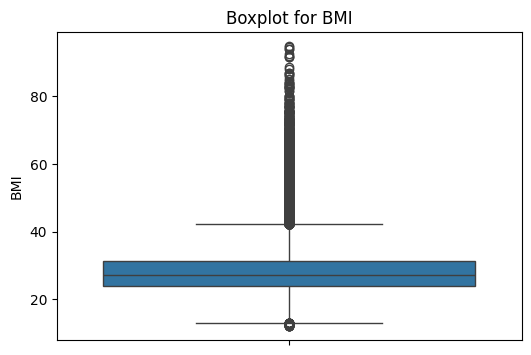

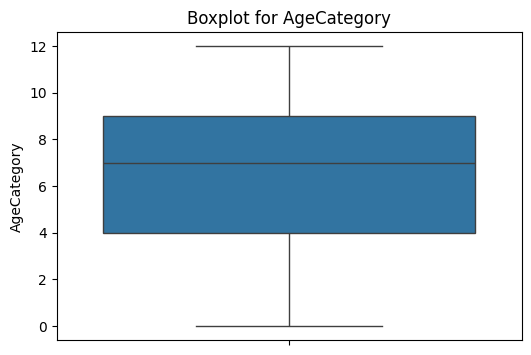

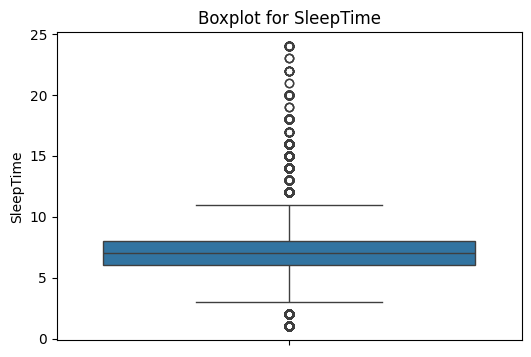

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plotting boxplot for continuous variable to check for outliers

for column in data.columns:
    if column in ['BMI','AgeCategory', 'SleepTime']:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=data[column])
        plt.title(f"Boxplot for {column}")
        plt.ylabel(column)
        plt.show()

In [60]:
#Removing Outliers if they are outside the lower and upper bound

numerical_columns = ['BMI','AgeCategory','SleepTime']
for column in numerical_columns:

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [62]:
cleaned_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male
0,0,16.60,1,0,0,3,30,0,7.0,1.0,1,4.0,5,1,0,1,1.0,0.0
1,0,20.34,0,0,1,0,0,0,12.0,0.0,1,4.0,7,0,0,0,1.0,0.0
2,0,26.58,1,0,0,20,30,0,9.0,1.0,1,1.0,8,1,0,0,0.0,1.0
3,0,24.21,0,0,0,0,0,0,11.0,0.0,0,2.0,6,0,0,1,1.0,0.0
4,0,23.71,0,0,0,28,0,1,4.0,0.0,1,4.0,8,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0,0,0,0.0,0.0,1,0.0,8,0,0,0,1.0,0.0
319790,1,27.41,1,0,0,7,0,1,8.0,1.0,0,1.0,6,1,0,0,0.0,1.0
319791,0,29.84,1,0,0,0,0,0,3.0,0.0,1,4.0,5,1,0,0,0.0,1.0
319792,0,24.24,0,0,0,0,0,0,5.0,0.0,1,2.0,6,0,0,0,1.0,0.0


8. Normalization

In [63]:
from sklearn import preprocessing

scalingObj = preprocessing.MinMaxScaler()
cleaned_data[['BMI','PhysicalHealth','MentalHealth','AgeCategory','GenHealth','SleepTime']]=scalingObj.fit_transform(cleaned_data[['BMI','PhysicalHealth','MentalHealth','AgeCategory','GenHealth','SleepTime']])
cleaned_data

C:\Users\Abin_Study\AppData\Local\Temp\ipykernel_8700\1430594513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[['BMI','PhysicalHealth','MentalHealth','AgeCategory','GenHealth','SleepTime']]=scalingObj.fit_transform(cleaned_data[['BMI','PhysicalHealth','MentalHealth','AgeCategory','GenHealth','SleepTime']])


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male
0,0,0.055294,1,0,0,0.100000,1.0,0,0.583333,1.0,1,1.00,0.250,1,0,1,1.0,0.0
1,0,0.100447,0,0,1,0.000000,0.0,0,1.000000,0.0,1,1.00,0.500,0,0,0,1.0,0.0
2,0,0.175782,1,0,0,0.666667,1.0,0,0.750000,1.0,1,0.25,0.625,1,0,0,0.0,1.0
3,0,0.147169,0,0,0,0.000000,0.0,0,0.916667,0.0,0,0.50,0.375,0,0,1,1.0,0.0
4,0,0.141132,0,0,0,0.933333,0.0,1,0.333333,0.0,1,1.00,0.625,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,0.123144,0,0,0,0.000000,0.0,0,0.000000,0.0,1,0.00,0.625,0,0,0,1.0,0.0
319790,1,0.185802,1,0,0,0.233333,0.0,1,0.666667,1.0,0,0.25,0.375,1,0,0,0.0,1.0
319791,0,0.215139,1,0,0,0.000000,0.0,0,0.250000,0.0,1,1.00,0.250,1,0,0,0.0,1.0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0.416667,0.0,1,0.50,0.375,0,0,0,1.0,0.0


9. Storing Data into Realtional Database; MySQL

In [64]:
from sqlalchemy import create_engine

# Step 1: Database Connection
db_user = 'root'           # Replace with your MySQL username
db_password = 'root'   # Replace with your MySQL password
db_host = 'localhost'      # Replace if your database is hosted remotely
db_name = 'processed_heart_data'    # Database name

# Create connection string
connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Step 2: Load the DataFrame into MySQL
table_name = 'heart_data_processed'  # Name of the table to create
cleaned_data.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

306043

10. Fetching Data from Relational Database

In [65]:
import pandas as pd
import mysql.connector  # Or use pymysql if preferred

db_config = {
    "host": "localhost",
    "user": "root",
    "password": "root",
    "database": "processed_heart_data"
}

# Create a connection to the MySQL database
try:
    conn = mysql.connector.connect(**db_config)
except mysql.connector.Error as e:
    print(f"Error connecting to MySQL: {e}")
    exit(1)

# SQL query to fetch data
query = "SELECT * FROM heart_data_processed;"  # Replace with your table name or custom query

# Load data into a pandas DataFrame
try:
    df = pd.read_sql(query, conn)
    print("Data successfully loaded into a DataFrame.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit(1)

# Close the connection
conn.close()


C:\Users\Abin_Study\AppData\Local\Temp\ipykernel_8700\2415483960.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Data successfully loaded into a DataFrame.


In [66]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male
0,0,0.055294,1,0,0,0.100000,1.0,0,0.583333,1.0,1,1.00,0.250,1,0,1,1.0,0.0
1,0,0.100447,0,0,1,0.000000,0.0,0,1.000000,0.0,1,1.00,0.500,0,0,0,1.0,0.0
2,0,0.175782,1,0,0,0.666667,1.0,0,0.750000,1.0,1,0.25,0.625,1,0,0,0.0,1.0
3,0,0.147169,0,0,0,0.000000,0.0,0,0.916667,0.0,0,0.50,0.375,0,0,1,1.0,0.0
4,0,0.141132,0,0,0,0.933333,0.0,1,0.333333,0.0,1,1.00,0.625,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306038,0,0.123144,0,0,0,0.000000,0.0,0,0.000000,0.0,1,0.00,0.625,0,0,0,1.0,0.0
306039,1,0.185802,1,0,0,0.233333,0.0,1,0.666667,1.0,0,0.25,0.375,1,0,0,0.0,1.0
306040,0,0.215139,1,0,0,0.000000,0.0,0,0.250000,0.0,1,1.00,0.250,1,0,0,0.0,1.0
306041,0,0.147531,0,0,0,0.000000,0.0,0,0.416667,0.0,1,0.50,0.375,0,0,0,1.0,0.0


11. Data Visualizations

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

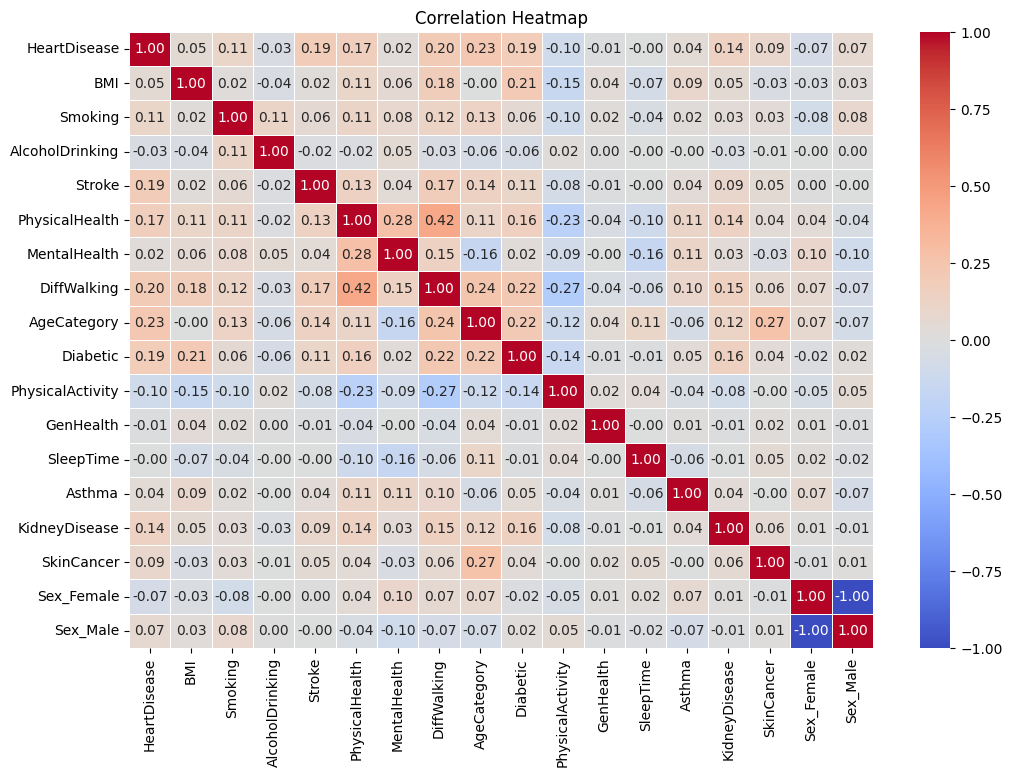

In [68]:
#Plotting Heat map
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

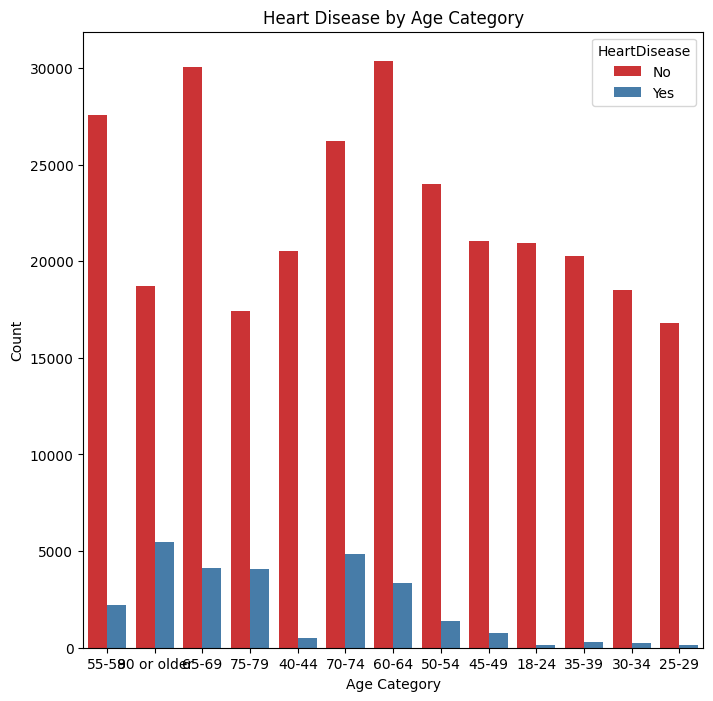

In [69]:
plt.figure(figsize=(8, 8))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=vis_data, palette='Set1')
plt.title('Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


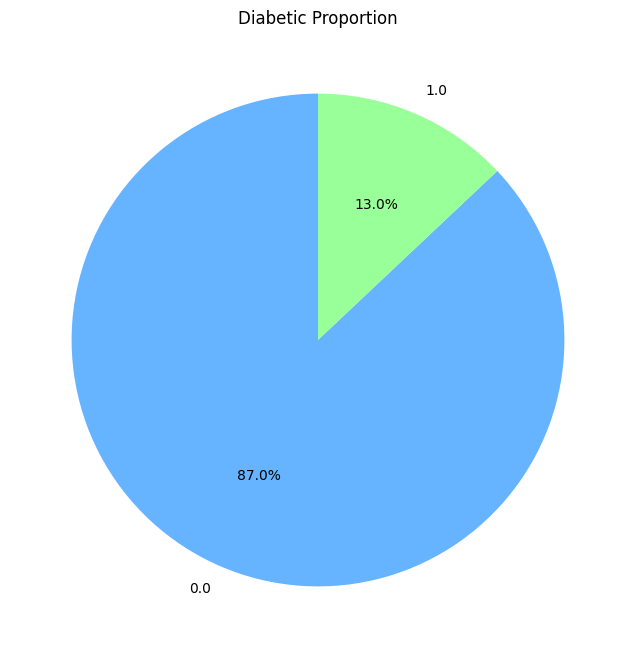

In [70]:
plt.figure(figsize=(8, 8))
diabetic_counts = df['Diabetic'].value_counts()
diabetic_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90)
plt.title('Diabetic Proportion')
plt.ylabel('')
plt.show()


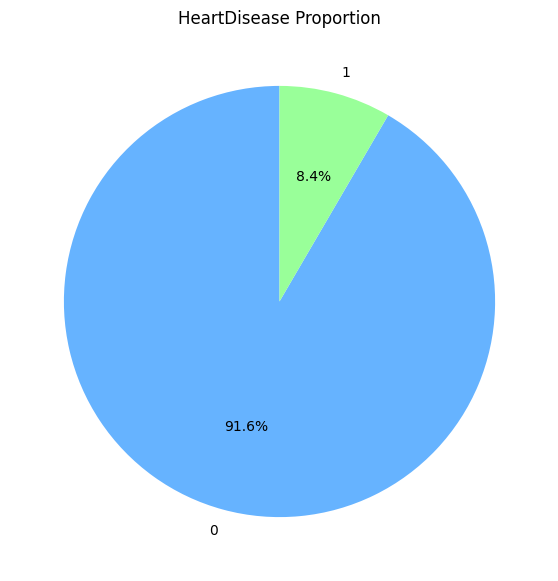

In [71]:
plt.figure(figsize=(7, 7))
diabetic_counts = df['HeartDisease'].value_counts()
diabetic_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90)
plt.title('HeartDisease Proportion')
plt.ylabel('')
plt.show()

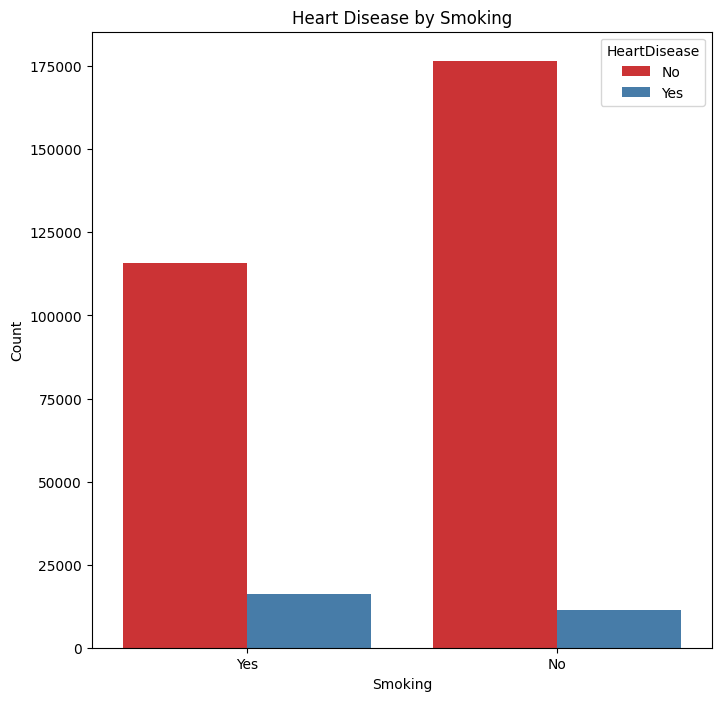

In [72]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Smoking', hue='HeartDisease', data=vis_data, palette='Set1')
plt.title('Heart Disease by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

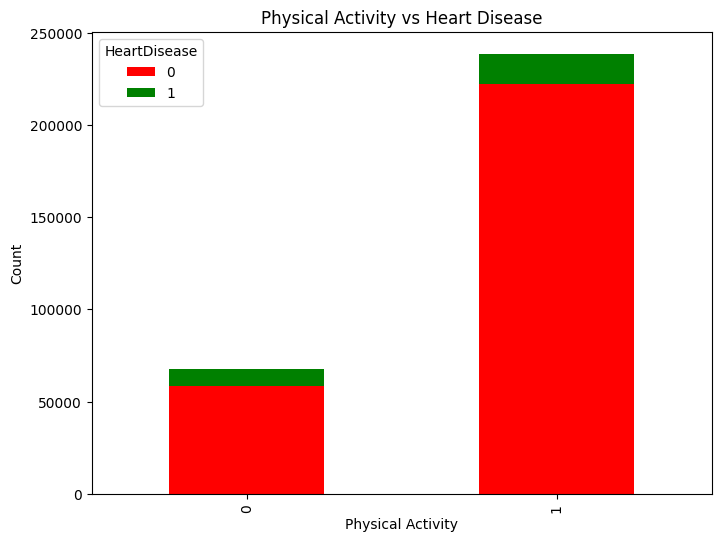

In [73]:
physical_activity_heartdisease = pd.crosstab(df['PhysicalActivity'], df['HeartDisease'])
physical_activity_heartdisease.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])
plt.title('Physical Activity vs Heart Disease')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()

C:\Users\Abin_Study\AppData\Local\Temp\ipykernel_8700\2318144714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AgeCategory', y='SleepTime', data=vis_data, palette='Set2')


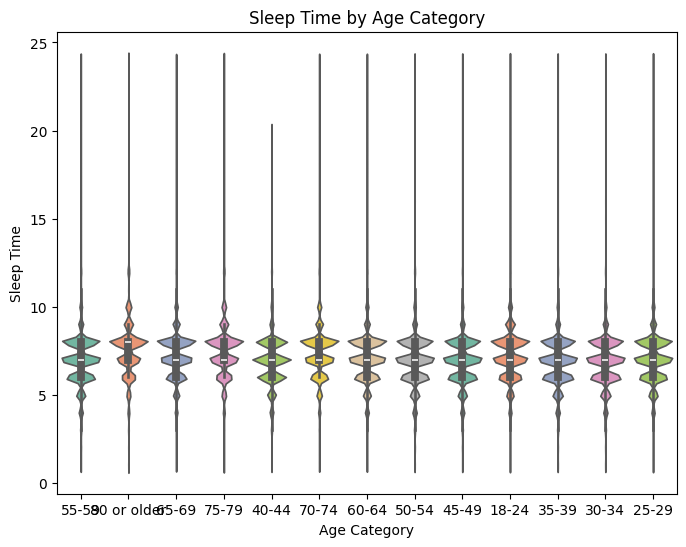

In [74]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='AgeCategory', y='SleepTime', data=vis_data, palette='Set2')
plt.title('Sleep Time by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Sleep Time')
plt.show()

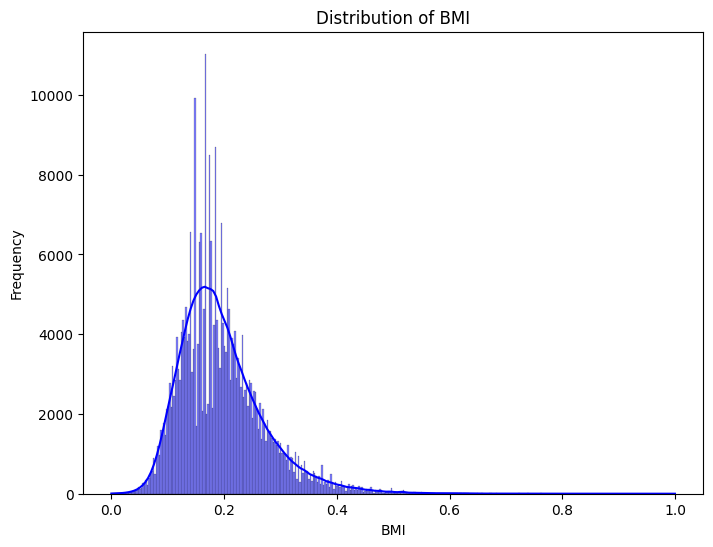

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, color='blue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


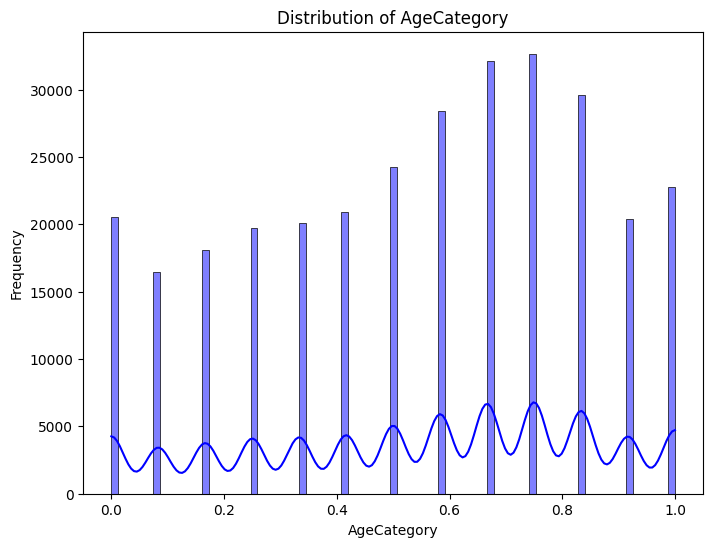

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AgeCategory'], kde=True, color='blue')
plt.title('Distribution of AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()


12. Dimensionality Reduction

In [77]:
X = df.drop('HeartDisease', axis=1) #Assigning X with feature columns
y = df['HeartDisease'] #Assigning y with target

In [78]:
#Using PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn import tree
import numpy as np

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize and evaluate a DecisionTreeClassifier without PCA
clf = tree.DecisionTreeClassifier() #Decision Tree classifier
scores = cross_val_score(clf, X, y, cv=10) # Perform 10-fold cross-validation
print ("Original Accuracy", np.mean(scores))

#Applying PCA for dimensionality reduction
pca = decomposition.PCA(n_components = 'mle', svd_solver = 'full')
pca.fit(X)
X = pca.transform(X)

print (X.shape) # Print the shape of the transformed feature matrix

print ("Explained Variance: ",np.sum(pca.explained_variance_ratio_))
#Evaluating Decision tree classifier after applying PCA
clf = tree.DecisionTreeClassifier() 
scores = cross_val_score(clf, X, y, cv=10)
print (np.mean(scores))

Original Accuracy 0.8669696815437536
(306043, 16)
Explained Variance:  0.9999999999999998
0.8660842014708349


13. Feature Selection

In [79]:
X = df.drop('HeartDisease', axis=1) #Assigning X with feature columns
y = df['HeartDisease'] #Assigning y with target

In [80]:
#Tree Based feature selection using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42) #mentionaning random state
model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

             Feature  Importance
0                BMI    0.397436
7        AgeCategory    0.103179
11         SleepTime    0.102804
4     PhysicalHealth    0.077853
5       MentalHealth    0.071290
10         GenHealth    0.057754
3             Stroke    0.027113
6        DiffWalking    0.025138
9   PhysicalActivity    0.022843
8           Diabetic    0.021606
12            Asthma    0.019351
1            Smoking    0.017199
14        SkinCancer    0.016563
13     KidneyDisease    0.014399
16          Sex_Male    0.008886
2    AlcoholDrinking    0.008854
15        Sex_Female    0.007733


In [81]:
#feature selection using chi-squared 

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

k = 10 #Top 10 features
selector = SelectKBest(chi2, k=k)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the selected feature columns based on the chi-squared test
selected_features = X.columns[selector.get_support()]

# Print the selected features
print(f"Selected features based on chi-squared test: {selected_features}")


feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Squared Score': selector.scores_,
    'p-value': selector.pvalues_
})

# Sort the features by chi-squared score
feature_scores = feature_scores.sort_values(by='Chi-Squared Score', ascending=False)

# Print feature scores
print("\nChi-Squared Feature Scores:")
print(feature_scores)

Selected features based on chi-squared test: Index(['Smoking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'AgeCategory',
       'Diabetic', 'KidneyDisease', 'SkinCancer', 'Sex_Female', 'Sex_Male'],
      dtype='object')

Chi-Squared Feature Scores:
             Feature  Chi-Squared Score        p-value
3             Stroke       11059.433521   0.000000e+00
6        DiffWalking       10559.437791   0.000000e+00
8           Diabetic        9159.695465   0.000000e+00
13     KidneyDisease        6107.828807   0.000000e+00
4     PhysicalHealth        5400.813967   0.000000e+00
7        AgeCategory        2741.185566   0.000000e+00
14        SkinCancer        2417.180733   0.000000e+00
1            Smoking        2063.939954   0.000000e+00
16          Sex_Male         763.459429  4.751945e-168
15        Sex_Female         703.748617  4.576631e-155
9   PhysicalActivity         655.373320  1.515400e-144
12            Asthma         412.396171   1.102923e-91
2    AlcoholDrinking         317.357

In [25]:
X = df.drop('HeartDisease', axis=1) #Assigning X with feature columns
y = df['HeartDisease'] #Assigning y with target

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Class distribution before SMOTE:", Counter(y))

smote = SMOTE(random_state=42)

# Resample the training set
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42) #SPlitting Data

Class distribution before SMOTE: Counter({0: 283979, 1: 26476})
Class distribution after SMOTE: Counter({0: 198785, 1: 198785})


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
# Train the model
model = RandomForestClassifier(
    random_state=42,       # Ensures reproducibility
    n_estimators=100,      # Number of trees in the forest
    max_depth=10,          # Maximum depth of the tree
    max_leaf_nodes=20,     # Maximum number of leaf nodes in a tree
    criterion='gini',      
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Evaluation of Random Forest Classifier: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")

Evaluation of Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.82      0.72      0.77     85110
           1       0.75      0.84      0.79     85278

    accuracy                           0.78    170388
   macro avg       0.79      0.78      0.78    170388
weighted avg       0.79      0.78      0.78    170388

Confusion Matrix:
[[61400 23710]
 [13469 71809]]

Accuracy Score: 0.781798013944644
AUC Score: 0.7817385401221061


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

# Model 1: Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_logistic))
auc_score = roc_auc_score(y_test, y_pred_logistic)
print(f"AUC Score: {auc_score}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75     85110
           1       0.75      0.78      0.76     85278

    accuracy                           0.76    170388
   macro avg       0.76      0.76      0.76    170388
weighted avg       0.76      0.76      0.76    170388

Confusion Matrix:
[[62608 22502]
 [19021 66257]]

Accuracy Score: 0.7563032607930136
AUC Score: 0.7562828803426738


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_nb))
auc_score_nb = roc_auc_score(y_test, y_pred_nb)
print(f"AUC Score: {auc_score_nb}")

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74     85110
           1       0.77      0.63      0.69     85278

    accuracy                           0.72    170388
   macro avg       0.73      0.72      0.72    170388
weighted avg       0.73      0.72      0.72    170388

Confusion Matrix:
[[68986 16124]
 [31710 53568]]

Accuracy Score: 0.7192642674366739
AUC Score: 0.7193541861714949
